# Chi-Squared Distribution
***
## Definition
>The Chi-Squared distribution is a continous probability distribution focused on sample standard deviations and can (e.g.) "let you know whether two groups have significantly different opinions, which makes it a very useful statistic for survey research"  $ ^{[1]}$.

## Formula
The probability mass function of a Chi-Squared distributed random variable is defined as:
$$
 \begin{equation}
    f(x|k) =
    \begin{cases}
      \frac{x^{\frac{k}{2}-1}e^{-\frac{x}{2}}}{2^{\frac{k}{2}}\Gamma(\frac{k}{2})}, & \text{if}\ x>0 \\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}
$$<br>
where
$$ \Gamma(n) = (n-1)! $$<br>
and $k$ denotes the degrees of freedom.

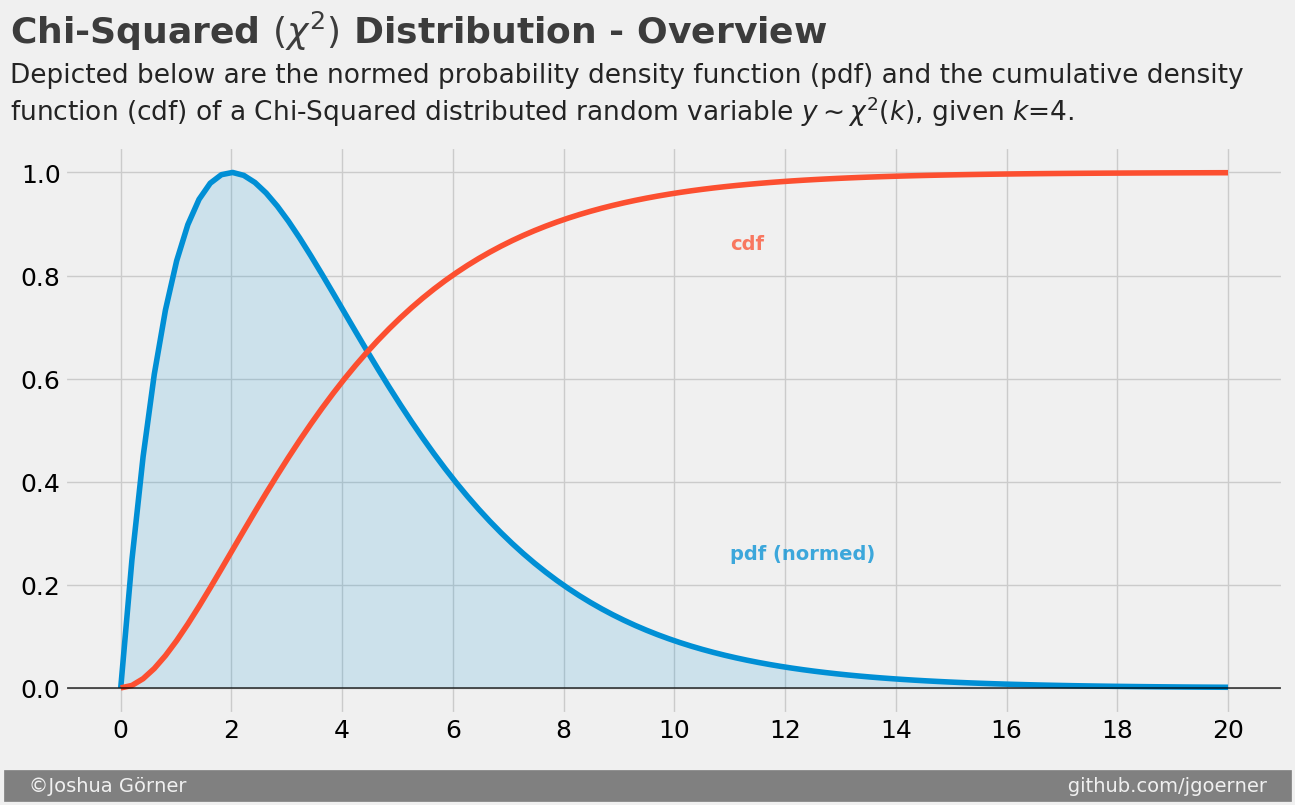

In [2]:
# %load ../src/chi2/01_general.py

***
## Parameters

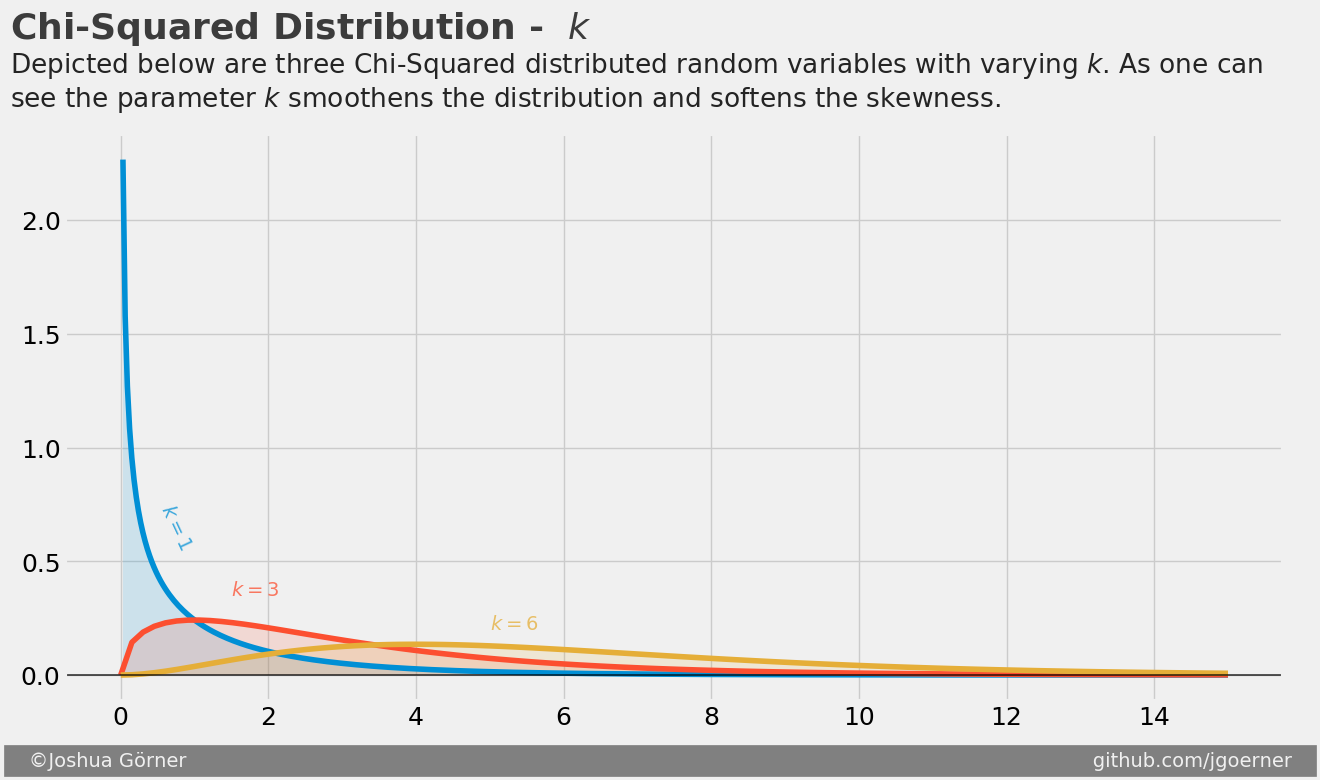

In [44]:
# %load ../src/chi2/02_k.py

***
## Implementation in Python
Multiple Python packages implement the Chi-Squared distribution. One of those is the stats.poisson module from the scipy package. The following methods are only an excerpt. For a full list of features the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) should be read.

### Random Variates
In order to generate a random sample from, the function `rvs` should be used.


In [47]:
import numpy as np
from scipy.stats import chi2

# draw a single sample
np.random.seed(42)
print(chi2.rvs(df=4), end="\n\n")

# draw 10 samples
print(chi2.rvs(df=4, size=10), end="\n\n")

4.78735877974

[ 2.98892946  2.76456717  2.76460459  9.29942882  5.73341246  2.262156
  4.93962895  3.99792053  0.43182989  1.34248457]



### Probability Density Function
The probability mass function can be accessed via the `pdf` function. Like the rvs method, the pdf allows for adjusting the mean of the random variable:

pdf(1) = 0.15163266492815836
pdf(7) = 0.052845420989057375


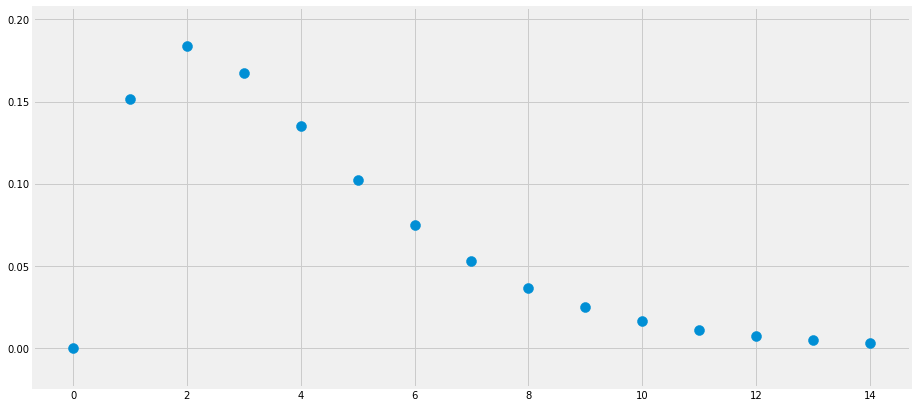

In [52]:
from scipy.stats import chi2

# additional imports for plotting purpose
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,7)

# likelihood of x and y
x = 1
y = 7
print("pdf(1) = {}\npdf(7) = {}".format(chi2.pdf(x=x, df=4), chi2.pdf(x=y, df=4)))

# continuous pdf for the plot
x_s = np.arange(15)
y_s = chi2.pdf(x=x_s, df=4)
plt.scatter(x_s, y_s, s=100);

### Cumulative Probability Density Function¶
The cumulative probability density function is useful when a probability range has to be calculated. It can be accessed via the `cdf` function:

In [53]:
from scipy.stats import chi2

# probability of x less or equal 0.3
print("P(X <=3) = {}".format(chi2.cdf(x=3, df=4)))

# probability of x in [-0.2, +0.2]
print("P(2 < X <= 8) = {}".format(chi2.cdf(x=8, df=4) - chi2.cdf(x=2, df=4)))

P(X <=3) = 0.4421745996289252
P(2 < X <= 8) = 0.6441806878992138


***
## Infering $k$
Given a sample of datapoints it is often required to estimate the "true" parameters of the distribution. In the case of the Chi-Squared distribution this estimation is quite simple. $k$ can be derived by calculating the mean of the sample.

Estimated k: 1.9450118959304488


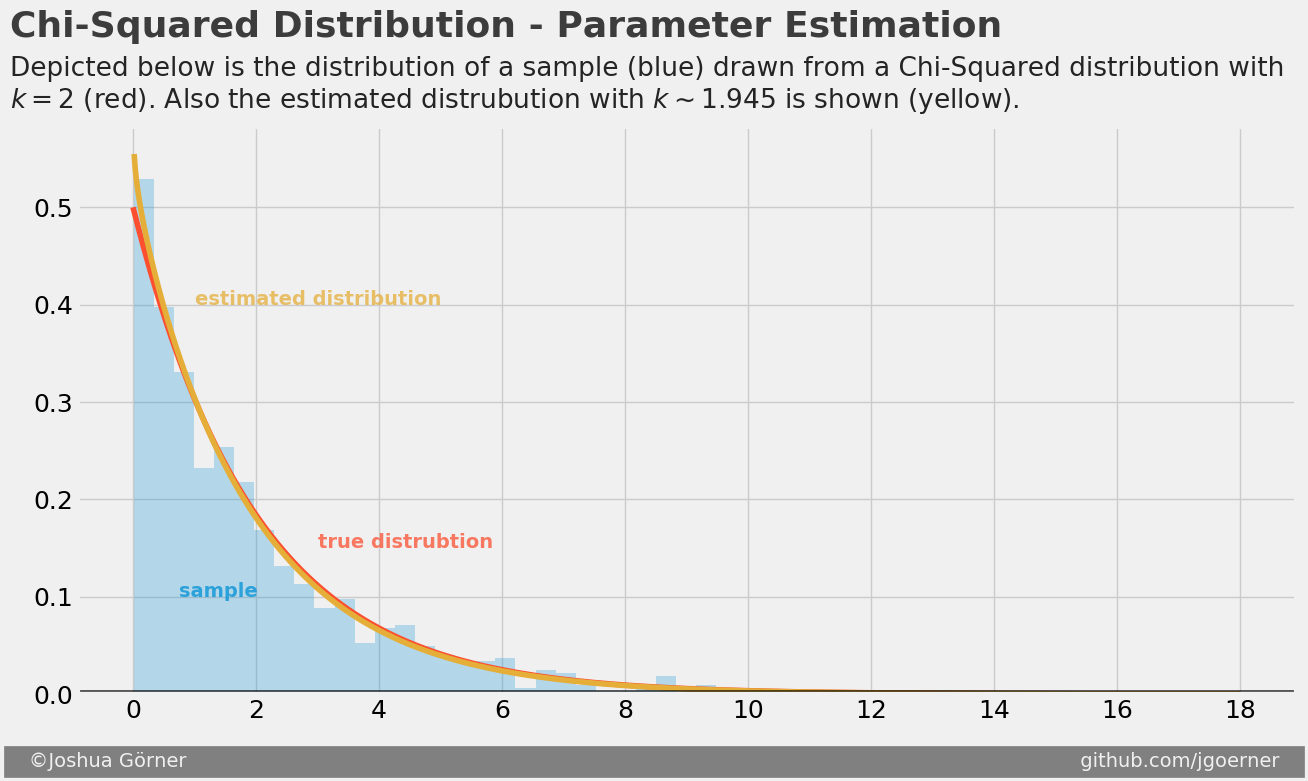

In [116]:
# %load ../src/chi2/03_estimation.py

## Infering $k$ - MCMC
In addition to a "direct" inference, $k$ can also be estimated using Markov chain Monte Carlo simulation - implemented in Python's [PyMC3](https://github.com/pymc-devs/pymc3).

Assigned Metropolis to k
100%|██████████| 50500/50500 [00:11<00:00, 4535.49it/s]


95% of sampled mus are between 2.0 and 2.0


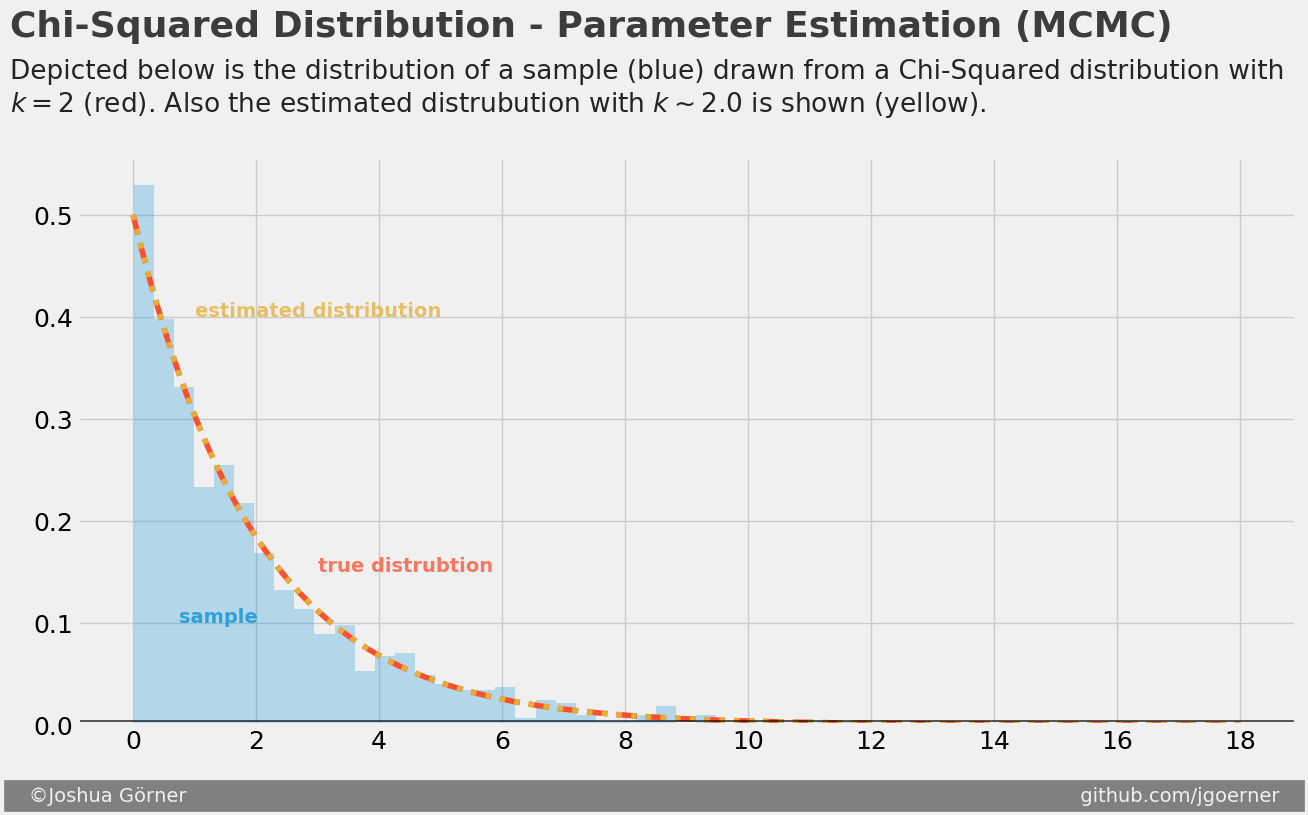

In [158]:
# %load ../src/chi2/04_MCMC_estimation.py

***
[1] - [Practical Surveys. Understanding Chi Squared](http://practicalsurveys.com/reporting/chisquare.php)